# Project Five
# Game of Thrones - TSNE

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
import spacy
from nltk import Tree
from nltk.grammar import DependencyGrammar
from nltk.parse import DependencyGraph
from nltk.parse import ProjectiveDependencyParser
from nltk.parse import NonprojectiveDependencyParser
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from gensim.models import Word2Vec
from nltk.tag import pos_tag
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Using Theano backend.


In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [3]:
import pickle

with open('/Users/zoemarkovits/Metis/project_five_got/total_corpus_texts2.pkl', 'rb') as f:
    total_corpus_texts = pickle.load(f)

In [4]:
total_corpus_texts

[['well', 'struck'],
 ['well', 'struck', 'dog'],
 ['like'],
 ['well', 'struck', 'grace'],
 ['already', 'said', 'well', 'struck'],
 ['yes', 'grace'],
 ['ser', 'dontos', 'red', 'house', 'hollard'],
 ['ser', 'dontos', 'red', 'house', 'hollard'],
 [],
 ['sorry', 'grace'],
 ['deepest', u'apology'],
 ['drunk'],
 [],
 ['uh'],
 ['grace'],
 ['two', u'cup', 'wine'],
 ['two', u'cup'],
 ['thats', 'much'],
 ['please', 'another', 'cup'],
 ['sure', 'grace'],
 ['two'],
 ['much', 'like'],
 ['would', 'honored', 'grace'],
 ['ser', 'meryn', 'help', 'ser', 'dontos', 'celebrate', 'name', 'day'],
 ['see', u'drink', 'fill'],
 ['cant'],
 ['say'],
 ['say', 'cant'],
 ['meant', 'would', 'bad', 'luck', 'kill', 'man', 'name', 'day'],
 ['kind', 'stupid', u'peasant', 'superstition', 'take', 'away'],
 ['ill', 'killed', 'tomorrow', 'fool'],
 [],
 ['fool', 'youre', 'clever', 'see'],
 ['hell', 'make', 'much', 'better', 'fool', 'knight'],
 ['doesnt', 'deserve', 'mercy', 'quick', 'death'],
 ['hear', 'lady', 'ser', 'dontos'

In [5]:
import gensim  
model = gensim.models.Word2Vec(total_corpus_texts, size=100, window=5, min_count=1, workers=2,sg=1)

In [6]:
model.wv.vocab.items()

[('foul', <gensim.models.keyedvectors.Vocab at 0x106a4e650>),
 ('four', <gensim.models.keyedvectors.Vocab at 0x116c10a10>),
 ('hanging', <gensim.models.keyedvectors.Vocab at 0x116dc8a10>),
 ('marching', <gensim.models.keyedvectors.Vocab at 0x116dc8b10>),
 (u'increase', <gensim.models.keyedvectors.Vocab at 0x118532810>),
 ('midafternoon', <gensim.models.keyedvectors.Vocab at 0x116dc8ad0>),
 ('mutinied', <gensim.models.keyedvectors.Vocab at 0x116dc88d0>),
 ('lord', <gensim.models.keyedvectors.Vocab at 0x116dc8a90>),
 (u'sinking', <gensim.models.keyedvectors.Vocab at 0x116dc8bd0>),
 ('leisurely', <gensim.models.keyedvectors.Vocab at 0x116dc8990>),
 (u'politician', <gensim.models.keyedvectors.Vocab at 0x116dc8690>),
 ('stabbed', <gensim.models.keyedvectors.Vocab at 0x116dc8b50>),
 ('bringing', <gensim.models.keyedvectors.Vocab at 0x1183464d0>),
 ('disturb', <gensim.models.keyedvectors.Vocab at 0x116dc8b90>),
 ('prize', <gensim.models.keyedvectors.Vocab at 0x116dc8d50>),
 ('wooden', <gensim

In [7]:
keys = model.wv.vocab.keys()

In [61]:
keys[5994:6914]

[u'garb',
 'cursed',
 'rising',
 'determine',
 'strictly',
 u'there',
 'strict',
 'shirei',
 'treat',
 'forbade',
 'tormunds',
 'mischief',
 'illuminated',
 'nightshade',
 u'regard',
 'amongst',
 'rouse',
 'faster',
 u'porkchop',
 'terminus',
 'preside',
 'grass',
 'creeping',
 'ruffian',
 'taste',
 'frighten',
 u'hornwood',
 'dagmer',
 'tasty',
 'mormont',
 'politics',
 'yunkais',
 'hasnt',
 'bedded',
 'rubbed',
 'idiot',
 'deserve',
 'compel',
 'residence',
 'butchery',
 'requested',
 'briefly',
 u'alys',
 u'separate',
 u'unbent',
 'grovel',
 'included',
 'suppertime',
 'applause',
 u'wife',
 'lysa',
 'odds',
 'calla',
 u'treason',
 'disr',
 'lace',
 u'pyrcelle',
 'lack',
 'executing',
 'follow',
 u'rhaegal',
 'hmmm',
 u'glimpse',
 'insensate',
 'lining',
 'painter',
 'woman',
 'worse',
 u'song',
 'far',
 'fat',
 u'cadaver',
 'worst',
 'rhoyne',
 'awful',
 'treating',
 'kingsguards',
 'shipboard',
 'list',
 'occurs',
 u'trench',
 u'ten',
 u'whent',
 'rate',
 'design',
 u'belief',
 's

In [85]:
len(keys)

6913

In [63]:
model_list = []

for i in model.wv.vocab.keys():
    model_list.append(model.wv[i])

In [64]:
model_list

[array([-0.21771973, -0.02527313, -0.02365804, -0.12821424, -0.1154706 ,
        -0.08296238, -0.11207184, -0.17107095, -0.01127736, -0.16318449,
         0.02395089, -0.09828245,  0.1367172 , -0.12240534, -0.00359782,
         0.17835496,  0.07731424, -0.08214632, -0.11756501, -0.01842353,
        -0.2314406 , -0.16815257,  0.03125668,  0.18294273,  0.17230716,
        -0.14728607, -0.01132462, -0.08834372, -0.07585568, -0.09053168,
        -0.28993604,  0.03916389, -0.00687114, -0.09896109,  0.04389082,
        -0.04380208, -0.18348184, -0.07112165,  0.0749177 ,  0.16782539,
        -0.11418268,  0.01310233, -0.02796599, -0.12505715,  0.1223262 ,
        -0.2189725 ,  0.12760969,  0.00467054, -0.01664873,  0.17561914,
         0.20993289,  0.07236387, -0.13211124, -0.04884741, -0.12837882,
        -0.14805064,  0.00421647,  0.06192831, -0.17968644, -0.16795456,
         0.09969519, -0.08367666,  0.15783331, -0.14849231,  0.02821023,
        -0.10142612, -0.03015564,  0.03558659,  0.0

In [65]:
type(model_list)

list

In [66]:
model_vectors = pd.DataFrame(model_list)
model_vectors.shape

(6913, 100)

In [67]:
model_vectors = model_vectors.reset_index()

In [68]:
model_vectors['index'] = model.wv.vocab.keys()

In [69]:
model_vectors = model_vectors.set_index('index')

In [70]:
model_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
index,,,,,,,,,,,,,,,,,,,,,
foul,-0.217720,-0.025273,-0.023658,-0.128214,-0.115471,-0.082962,-0.112072,-0.171071,-0.011277,-0.163184,...,0.054896,0.025883,-0.190913,-0.143407,-0.064367,0.096041,-0.213627,0.006941,-0.145625,0.014778
four,-0.293340,-0.034103,-0.031892,-0.180602,-0.145139,-0.105391,-0.159735,-0.235884,-0.026719,-0.215333,...,0.073672,0.030922,-0.258587,-0.188777,-0.084191,0.132590,-0.293866,0.019316,-0.188250,0.014867
hanging,-0.145032,-0.022251,-0.017037,-0.086634,-0.070207,-0.056811,-0.080332,-0.113224,-0.012928,-0.100629,...,0.039789,0.018846,-0.130379,-0.091104,-0.049824,0.068133,-0.148326,0.006445,-0.090617,0.003435
marching,-0.273178,-0.023888,-0.029667,-0.160671,-0.139785,-0.101213,-0.149493,-0.231204,-0.027977,-0.200670,...,0.070004,0.035212,-0.237270,-0.181774,-0.089395,0.122984,-0.273737,0.008937,-0.177569,0.015892
increase,-0.050201,-0.001083,-0.009169,-0.031344,-0.025462,-0.018542,-0.029650,-0.047794,-0.006738,-0.038845,...,0.017128,0.002257,-0.041799,-0.037273,-0.020058,0.020613,-0.048895,0.006642,-0.037880,0.003746


In [71]:
model_vectors.index

Index([        u'foul',         u'four',      u'hanging',     u'marching',
           u'increase', u'midafternoon',     u'mutinied',         u'lord',
            u'sinking',    u'leisurely',
       ...
              u'lance',       u'risked',       u'squeak',       u'oberyn',
              u'cliff',    u'auxiliary',        u'wylla',    u'firestorm',
         u'baratheons',  u'furthermore'],
      dtype='object', name=u'index', length=6913)

In [72]:
pca20 = PCA(n_components=20)

pca_results20 = pca20.fit_transform(model_vectors)

In [73]:
pca_results_20 = pd.DataFrame(pca_results20)

In [74]:
pca_results_20 = pca_results_20.reset_index()

In [75]:
pca_results_20['index'] = model.wv.vocab.keys()

In [76]:
pca_results_20 = pca_results_20.set_index('index')

In [77]:
pca_results_20.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
index,,,,,,,,,,,,,,,,,,,,
foul,0.469911,-0.007657,-0.029204,0.002051,0.008656,-0.007044,0.004429,0.003159,0.000038,-0.002190,-0.001066,-0.005229,-0.004910,-0.005333,-0.001956,-0.000478,-0.001743,-0.001077,0.002020,-0.002132
four,0.862143,-0.014516,-0.018555,0.027642,0.007341,0.000106,0.000654,0.013874,-0.002369,0.007810,-0.009090,-0.003197,-0.000552,-0.002095,0.002547,0.002788,0.001098,0.003387,-0.003063,0.006963
hanging,0.073769,-0.004199,-0.011154,0.009217,-0.000399,0.000355,0.005604,-0.003296,-0.005665,-0.003162,-0.005861,-0.000004,-0.005267,-0.001883,-0.001859,-0.002710,0.005012,-0.000804,-0.003675,-0.005437
marching,0.773648,-0.000528,-0.003481,0.028521,-0.005631,-0.009779,-0.013445,-0.004385,-0.008639,-0.003423,0.000682,0.000804,-0.001887,0.008220,0.004300,0.000188,-0.002601,-0.000937,0.002913,0.005065
increase,-0.422708,0.002282,0.002455,-0.001215,-0.002085,0.007188,0.000614,0.001622,-0.003648,-0.000301,-0.000296,0.002816,0.004837,0.000132,-0.002626,0.000526,-0.007023,0.003887,-0.000010,0.002081


In [78]:
tsne = TSNE(n_components=2)

tsne_pca_results20 = tsne.fit_transform(pca_results20)

In [79]:
tsne_pca_results_20 = pd.DataFrame(tsne_pca_results20)

In [80]:
tsne_pca_results_20 = tsne_pca_results_20.reset_index()

In [81]:
tsne_pca_results_20['index'] = model.wv.vocab.keys()

In [82]:
tsne_pca_results_20 = tsne_pca_results_20.set_index('index')

In [83]:
tsne_pca_results_20.shape

(6913, 2)

In [84]:
tsne_pca_results_20.head(10)

,0,1
index,,
foul,8.231730e+16,-1.390460e+15
four,-9.725615e+16,-7.752566e+15
hanging,-5.334475e+17,-1.704330e+17
marching,-9.903639e+16,-3.387085e+16
increase,-4.049110e+17,5.514100e+17
midafternoon,-4.449218e+17,-4.420060e+16
mutinied,-5.658043e+17,-1.209401e+17
lord,8.997921e+17,3.705867e+17
sinking,-1.176085e+17,-1.538006e+17


In [92]:
tsne_pca_results_20.to_csv('list.csv', index=False)

In [93]:
tsne_pca_results_20.shape

(6913, 2)

In [87]:
tsne_pca_results20

array([[  8.23172964e+16,  -1.39046011e+15],
       [ -9.72561548e+16,  -7.75256553e+15],
       [ -5.33447458e+17,  -1.70432977e+17],
       ..., 
       [ -6.80269414e+16,  -2.70386067e+17],
       [  1.28753254e+17,   7.62476138e+16],
       [  8.16696980e+17,   4.55501123e+17]])

In [88]:
tsne_pca_results_20.index

Index([        u'foul',         u'four',      u'hanging',     u'marching',
           u'increase', u'midafternoon',     u'mutinied',         u'lord',
            u'sinking',    u'leisurely',
       ...
              u'lance',       u'risked',       u'squeak',       u'oberyn',
              u'cliff',    u'auxiliary',        u'wylla',    u'firestorm',
         u'baratheons',  u'furthermore'],
      dtype='object', name=u'index', length=6913)

<IPython.core.display.Javascript object>


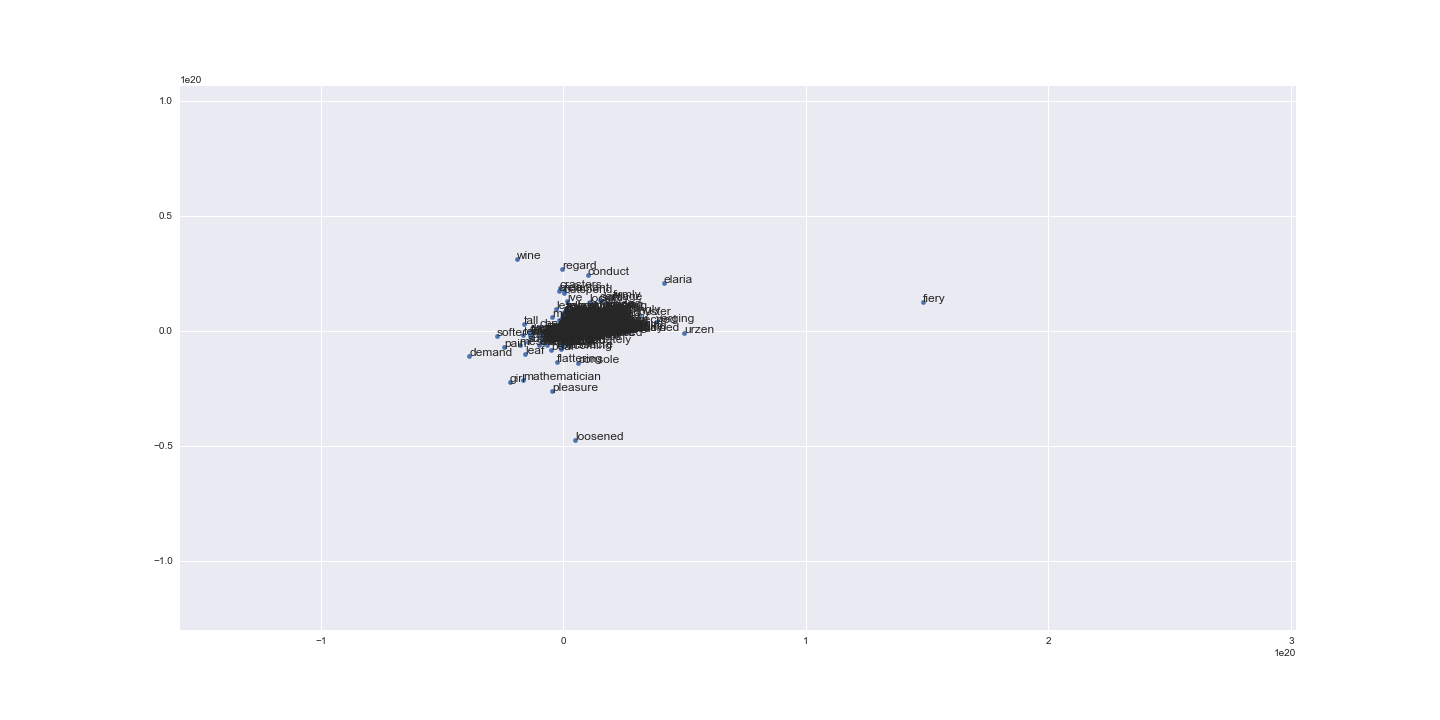

In [91]:
import numpy as Math
import pylab as Plot
import matplotlib.pyplot as plt

rows = tsne_pca_results_20.index
%matplotlib notebook
plt.ion()

Plot.figure(figsize=(20, 10))
max_x = Math.amax(tsne_pca_results20, axis=0)[0]
max_y = Math.amax(tsne_pca_results20, axis=0)[1]
#Plot.xlim((-.125e+20,.25e+20))
#Plot.ylim((-.125+e20,.1e20))

Plot.scatter(tsne_pca_results20[:, 0], tsne_pca_results20[:, 1], 20);

for row_id in range(0, len(rows)):
    target_word = rows[row_id]
    x = tsne_pca_results20[row_id, 0]
    y = tsne_pca_results20[row_id, 1]
    Plot.annotate(target_word, (x,y))

Plot.savefig("tsne_2002.png");